In [12]:
import pandas as pd
import matplotlib.pyplot as plt


def read_csv(name: str):
    df = pd.read_csv(name)
    df = df.drop(columns=[col for col in df.columns if "MIN" in col or "MAX" in col])
    df.columns = [col.split(" -")[0] for col in df.columns]
    return df.set_index("Step")




batch_length = read_csv("wandb_export_2025-02-17-length.csv")
time = read_csv("wandb_export_2025-02-17-time.csv")


In [13]:
def compute_statistics(df_input):
    df = []
    for col in run_names:
        t = df_input[col].dropna()
        t = t[len(t) // 10:]
        df.append(
            {
                "mean": t.mean(),
                "median": t.median(),
                "min": t.min(),
                "max": t.max(),
            }
        )

    df = pd.DataFrame(df, index=run_names)
    print()
    display(df)
    return df

print('batch_size = 32\n')
print('Time:')
time_stat = compute_statistics(time)
print('Length of input in batch:')
batch_length_stat = compute_statistics(batch_length)

batch_size = 32

Time:



,mean,median,min,max
BigBrain,0.017211,0.017050,0.001247,0.047711
Brain,0.045666,0.045503,0.003234,0.047666
UltraBigBrain_k=1,0.005450,0.004460,0.001161,0.044642
UltraBigBrain_k=5,0.005665,0.004675,0.001256,0.045050
UltraBigBrain_k=10,0.005781,0.004743,0.001257,0.035886
UltraBigBrain_k=20,0.006015,0.004806,0.001276,0.036593
UltraBigBrain_k=50,0.007130,0.005900,0.001377,0.045423
UltraBigBrain_k=640,0.019187,0.018355,0.001439,0.047253


Length of input in batch:



,mean,median,min,max
BigBrain,269.307587,262.0,7.0,640.0
Brain,640.000000,640.0,640.0,640.0
UltraBigBrain_k=1,89.183556,75.0,1.0,637.0
UltraBigBrain_k=5,89.270444,75.0,5.0,640.0
UltraBigBrain_k=10,92.978000,80.0,8.0,630.0
UltraBigBrain_k=20,96.934889,80.0,10.0,640.0
UltraBigBrain_k=50,115.033717,99.0,11.0,640.0
UltraBigBrain_k=640,297.730164,286.0,74.0,640.0


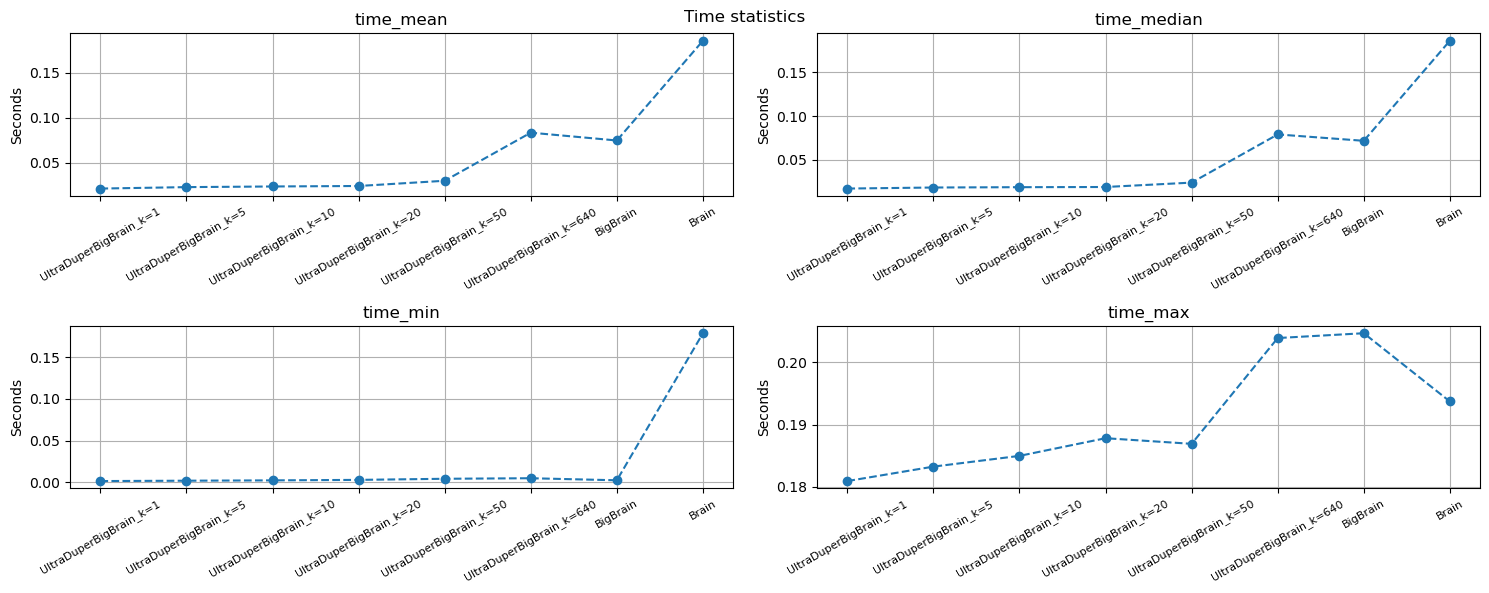

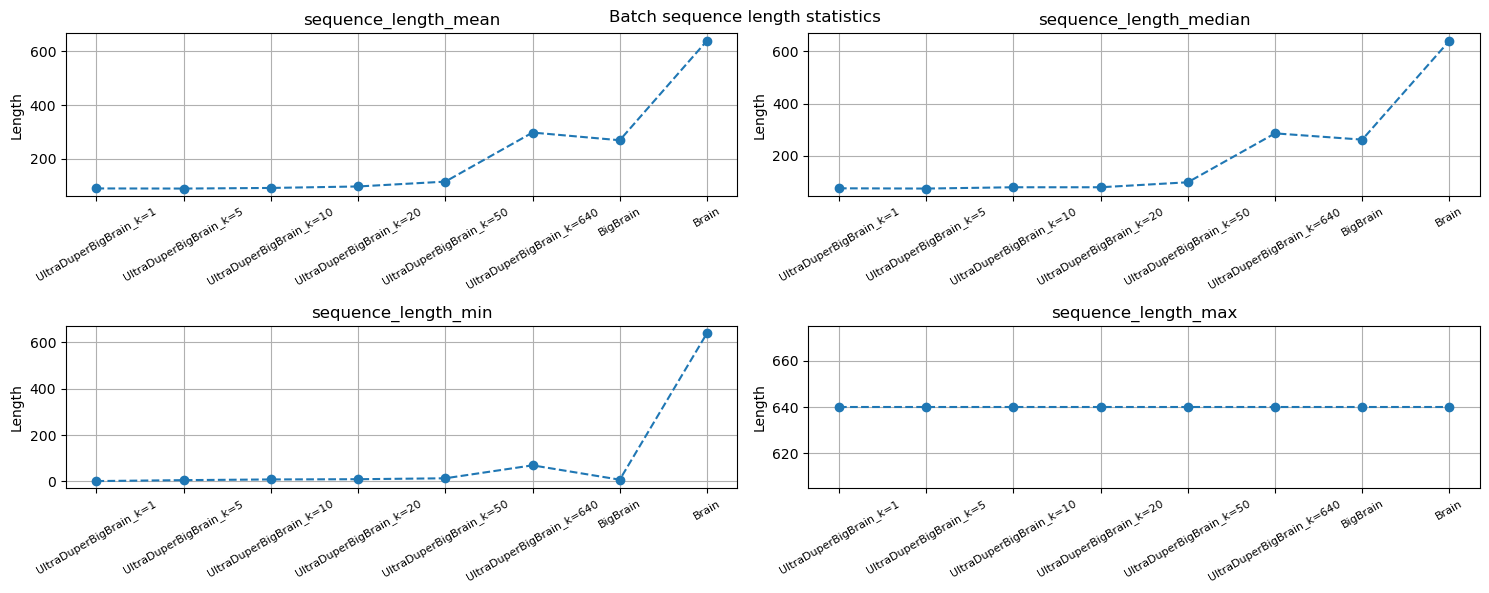

In [4]:
def plot_stats(df, label, ylabel):
    plt.subplots(2, 2, figsize=(15, 6))

    for i, col in enumerate(df.columns):
        plt.subplot(2, 2, i + 1)
        df[col].plot(marker='o', linestyle='--')
        plt.grid()
        plt.ylabel(ylabel)
        plt.title(f'{label}_{col}')

        plt.xticks(rotation=30, fontsize=8)

    plt.tight_layout()


plot_stats(time_stat, label='time', ylabel='Seconds')
plt.suptitle('Time statistics')
plt.show()

plot_stats(batch_length_stat, label='sequence_length', ylabel='Length')
plt.suptitle('Batch sequence length statistics')
plt.show()

https://wandb.ai/dog-kirill-belyakov/efdl-hw-2-task-2


- Did not manage to implement UltraBigBrainDataset class
- Padding all sequences to the maximum length in the dataset is highly inefficient and should be avoided.
- Performing padding within the `collate_fn` function significantly boosts performance, as transformers operate in \(O(N^2)\) complexity, where \(N\) is the input sequence length.
- Grouping sequences of similar lengths within a batch drastically accelerates training—potentially by an order of magnitude. However, this approach can introduce sample correlation within batches, which may negatively impact model generalization, so it should be applied with caution.

- Padding sequences to maximum size in the dataset is a terrible idea
- Padding sequences in collate_fn function improves the performance by a lot given that transformers work in O(N^2) where N is the length of input sequence
- Sampling similar length sequences in one batch speeds up training by an order of magnitude. However, it may decrease the model quality by providing correlated samples in one batch, so we should use it cautiously.